# Initial Data Observing

In [94]:
from rake_nltk import Rake
import re
import string
import pandas as pd

train = pd.read_csv('Flowster_Topic_Attributes_20200612000804.csv')

train = train[['Topic Title', 'Category', 'Tags', 'Author', 'Commenters',\
               'Leading Comment', 'Other Comments', 'Likes', 'Replies','Views']]

##### My interpretation of the below data:
1. The Forum's discussion is generated by a group of active individuals rather than a general populartion because there are only 82 unique authors for the 261 topics.
2. About 12.31% of non response rate for each post(calculated by (260-216-12)/260)), so it is a relatively active Forum.

In [95]:
print('Rows x Columns : ', train.shape[0], 'x', train.shape[1])
print('Features: ', train.columns.tolist())
print('\nUnique values:')
print(train.nunique())

# My interpretation of the data:
#1. The Forum's discussion is generated by a group of active individuals
#rather than a general populartion because there are only 82 unique authors for the 261 topics.
#2. About 12.31% of non response rate for each post(calculated by (260-216-12)/260)), 
#so it is a relatively active Forum.

Rows x Columns :  261 x 10
Features:  ['Topic Title', 'Category', 'Tags', 'Author', 'Commenters', 'Leading Comment', 'Other Comments', 'Likes', 'Replies', 'Views']

Unique values:
Topic Title        261
Category            12
Tags                35
Author              88
Commenters         108
Leading Comment    260
Other Comments     216
Likes               12
Replies             17
Views              145
dtype: int64


In [96]:
train.info()
train.dropna(inplace=True) #drop any null values
print('\nMissing values:  ', train.isnull().sum().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 10 columns):
Topic Title        261 non-null object
Category           261 non-null object
Tags               261 non-null object
Author             261 non-null object
Commenters         261 non-null object
Leading Comment    260 non-null object
Other Comments     261 non-null object
Likes              261 non-null int64
Replies            261 non-null int64
Views              261 non-null int64
dtypes: int64(3), object(7)
memory usage: 20.5+ KB

Missing values:   0


###### My interpretation of the data:
1. Viewers seldomly like posts
2. Some posts have a lot more views than others. Views are spread very unevenly.

In [97]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Likes,260.0,1.319231,2.346857,0.0,0.00,1.0,2.00,19.0
Replies,260.0,2.780769,4.038666,0.0,1.00,2.0,3.00,51.0
Views,260.0,167.807692,126.395414,0.0,106.75,151.5,216.25,736.0


###### My Thoughts in the data below:
Maybe it will be better to link the tags with the category so that we know which tag belongs to which category. But after mannually checking, the top 3 tags: 'Free SOPs'belongs to 'Flowster-specific', 'All Other Amazon Related Issues'to 'Amazon-specific', and 'Shipping' to 'Fulfillment'.

In [98]:
# Count of posts for each tag
train['Tags'].value_counts()

[]                                     116
['Free SOPs']                           18
['All Other Amazon Related Issues']     13
['Shipping']                            12
['Sourcing Brand Name Products']        12
['Updates']                             11
['Inventory Management']                11
['Managing a Virtual Team']              9
['PPC']                                  8
['Marketplace']                          5
['Leadership']                           5
['Accounting & Bookkeeping']             4
['Reviews & Customer Service']           3
['Shopify']                              3
['Email Marketing']                      3
['Recruiting']                           3
['Vendor Relations']                     3
['Vendor Management']                    3
['Pricing & Negotiation']                2
['Project Management']                   2
['Pricing Management']                   1
['Articles, Books, and Resources']       1
['All Other Traffic Sources']            1
['Performan

In [99]:
# Want to get views and number of commenters for each category

###### My interpretation of the data:
Flowster-specific, Amazon Specific, and Product Sourcing are far more active than other categories.

Flowster-specific             59
Product Sourcing              53
Amazon Specific               53
Human Resources               21
Fulfillment                   17
Management                    15
Software & Tools              14
Misc Topics                   10
Traffic Sources                8
Financial Management           7
eCommerce Marketplaces         2
Store & Website Management     1
Name: Category, dtype: int64


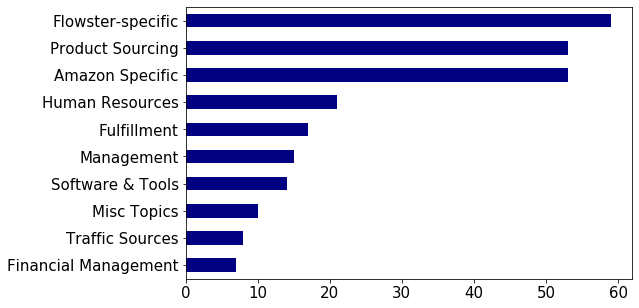

In [100]:
# Count of posts for each Category
print(train['Category'].value_counts())
# Graph of posts for each Category
train['Category'].value_counts()[0:10].plot(kind='barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()

###### # My interpretation of the data:
There are a few very active individuals who contribute to the activity more than others.

Kane           38
Trent-Admin    25
Laura          22
LizD           20
Mitch          17
               ..
Bill            1
mricozzi104     1
D.Jin           1
mtprep          1
watson          1
Name: Author, Length: 88, dtype: int64


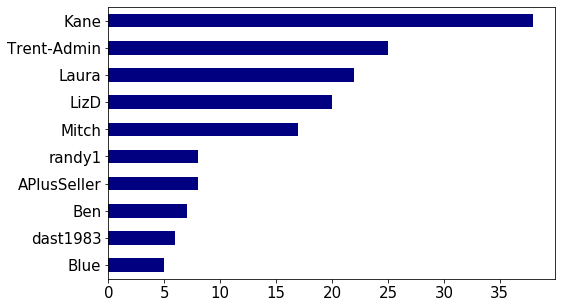

In [101]:
print(train['Author'].value_counts())
# Active Author
train['Author'].value_counts()[0:10].plot(kind='barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()

In [102]:
train['word_count'] = train['Leading Comment'].apply(lambda x: len(str(x).split(" ")))
train[['Leading Comment','word_count']].head()

,Leading Comment,word_count
0,Have questions about sourcing products? This i...,23
1,Hi! We are new to the forum and are going thro...,63
2,As I am working in Amazon as a seller from las...,81
3,"Does anyone have a VA they recommend, have use...",16
4,Can you sell branded products on Amazon Uk or ...,15


In [103]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

# number of stopwords
train['stopwords'] = train['Leading Comment'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['Leading Comment','stopwords']].head()

,Leading Comment,stopwords
0,Have questions about sourcing products? This i...,10
1,Hi! We are new to the forum and are going thro...,28
2,As I am working in Amazon as a seller from las...,23
3,"Does anyone have a VA they recommend, have use...",7
4,Can you sell branded products on Amazon Uk or ...,6


In [104]:
# number of numerics of '@'
train['hastags'] = train['Leading Comment'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
train[['Leading Comment','hastags']].head()

,Leading Comment,hastags
0,Have questions about sourcing products? This i...,0
1,Hi! We are new to the forum and are going thro...,0
2,As I am working in Amazon as a seller from las...,0
3,"Does anyone have a VA they recommend, have use...",0
4,Can you sell branded products on Amazon Uk or ...,0


In [105]:
# number of numerics
train['numerics'] = train['Leading Comment'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['Leading Comment','numerics']].head()

,Leading Comment,numerics
0,Have questions about sourcing products? This i...,0
1,Hi! We are new to the forum and are going thro...,0
2,As I am working in Amazon as a seller from las...,2
3,"Does anyone have a VA they recommend, have use...",0
4,Can you sell branded products on Amazon Uk or ...,0


# Pre-processing and Cleaning

In [106]:
copy_train = train.copy()

In [107]:
# Defined for clearning text
def data_processing(name_of_column):
    # Making words lowercase
    train[name_of_column]=train[name_of_column].apply(lambda x: x.lower())
    # Remove digits and words that contains digits
    train[name_of_column]=train[name_of_column].apply(lambda x: re.sub('\w*\d\w*','', x))
    # Remove extra spaces
    train[name_of_column]=train[name_of_column].apply(lambda x: re.sub(' +',' ',x))
    # Remove punctuations from comments
    train[name_of_column] = train[name_of_column].str.replace('[^\w\s]','')
    # Remove rare words
    freq = pd.Series(' '.join(train[name_of_column]).split()).value_counts()[-10:]
    freq = list(freq.index)
    train[name_of_column] = train[name_of_column].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    # Remove common words
    freq = pd.Series(' '.join(train[name_of_column]).split()).value_counts()[:10]
    freq = list(freq.index)
    train[name_of_column] = train[name_of_column].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    # Spelling correction
    ##from textblob import TextBlob
    ##train[name_of_column].apply(lambda x: str(TextBlob(x).correct()))

    # Importing spacy
    import spacy
    import en_core_web_sm
    nlp = en_core_web_sm.load()
    # Lemmatization with stopwords removal
    train['lemmatized '+ name_of_column]=train[name_of_column].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [108]:
# Cleaning data
data_processing('Leading Comment')
data_processing('Topic Title')
data_processing('Other Comments')

train.head()

,Topic Title,Category,Tags,Author,Commenters,Leading Comment,Other Comments,Likes,Replies,Views,word_count,stopwords,hastags,numerics,lemmatized Leading Comment,lemmatized Topic Title,lemmatized Other Comments
0,product sourcing category,Product Sourcing,[],Trent-Admin,[],have questions about sourcing products this ca...,,0,0,0,23,10,0,0,question source product category use sure sele...,product source category,
1,price checker competitor storefront extraction,Product Sourcing,[],Mitch,['MoniqueAndKerry'],hi we are new forum are going through product ...,yes will need paid version options extraction ...,1,2,38,63,28,0,0,hi new forum go product source professional so...,price checker competitor storefront extraction,yes need pay version option extraction tool in...
2,top tips grow business rapidly,Product Sourcing,['Purchasing'],Pradimna_Kumar,[],as am working in amazon as seller from last ye...,,0,0,0,81,23,0,2,work amazon seller year want tip sell grow bus...,tip grow business rapidly,
3,virtual assistants,Product Sourcing,[],JimW_PB,"['Rebca', 'McDavid', 'Mitch']",does anyone have va they recommend have used o...,mcdavid most dont want share any stellar va th...,0,3,156,16,7,0,0,va recommend currently require work,virtual assistant,mcdavid not want share stellar va currently go...
4,can you sell branded products on uk,Product Sourcing,['Sourcing Brand Name Products'],Rameksuya,['Mitch'],can sell branded products on amazon uk or must...,can sell on amazon uk as well it could actuall...,0,1,78,15,6,0,0,sell branded product amazon uk amazon com,sell branded product uk,sell amazon uk actually big selling point sour...


## Generate Word Cloud for Different Category of posts

In [109]:
###Start of getting the word graphs for different categories###

train_grouped=train[['Category','lemmatized Leading Comment', \
                     'lemmatized Topic Title', \
                     'lemmatized Other Comments']].groupby(by='Category').agg(lambda x: ' '.join(x))

# to combine 4 lists (4 columns) of key words into 1 sentence under Bag_of_words column
train_grouped['Bag_of_words'] = ''
columns = ['lemmatized Leading Comment', 'lemmatized Topic Title', 'lemmatized Other Comments']

for index, row in train_grouped.iterrows():
    words = ''
    for col in columns:
        words += ''.join(row[col]) + ' '
    row['Bag_of_words'] = words


# strip white spaces infront and behind, replace multiple whitespaces (if any)
train_grouped['Bag_of_words'] = train_grouped['Bag_of_words'].str.strip().str.replace('   ', ' ').str.replace('  ', ' ')
train_grouped

,lemmatized Leading Comment,lemmatized Topic Title,lemmatized Other Comments,Bag_of_words
Category,,,,
Amazon Specific,question amazon marketplace category use sure ...,specific category get positive review increase...,hi davidnyes use product review software zonm...,question amazon marketplace category use sure ...
Financial Management,question financial management category use sur...,financial management category cashback card no...,s good question luckni definitely google sear...,question financial management category use sur...
Flowster-specific,discussion flowster forum organization improve...,flowsterspecific category welcome flowster com...,thank kane know liz trouble hi kevinnyou tr...,discussion flowster forum organization improve...
Fulfillment,question fulfillment category use sure select ...,fulfillment category holiday fba warehouse in...,free mailer box usp believe use mix uline shi...,question fulfillment category use sure select ...
Human Resources,question human resource category use sure sele...,human resource category va revseller train va ...,suggest reach support try seller central coac...,question human resource category use sure sele...
Management,question management category use sure select a...,management category cheap way send money phili...,current favorite service send money abroadnnn...,question management category use sure select a...
Misc Topics,question thing not fall category category use ...,misc topics category party fulfillment service...,webs member live s louisiana area baton rouge ...,question thing not fall category category use ...
Product Sourcing,question source product category use sure sele...,product source category price checker competit...,yes need pay version option extraction tool i...,question source product category use sure sele...
Software & Tools,question software tool category use sure selec...,software tool category hubspot change adjust o...,kstot contact go delete partner fall sure hub...,question software tool category use sure selec...


In [110]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(train_grouped['Bag_of_words'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=train_grouped.index
df_dtm.head()

,abandon,ability,able,abovenan,abroadnnnntransferwise,absence,absolutely,absorb,abundance,abussine,...,zapi,zapier,zapiernnnnnnnif,zapiernnnnzapi,zaps,zentail,zero,zonmaster,zoom,zoominfocom
Category,,,,,,,,,,,,,,,,,,,,,
Amazon Specific,0,3,14,1,0,0,4,1,1,1,...,0,0,0,0,0,0,0,2,0,0
Financial Management,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Flowster-specific,3,1,6,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0
Fulfillment,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Human Resources,0,1,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [111]:
# Find the top 30 words in each category
top_dict = {}
df_dtm_transpose = df_dtm.transpose()
for c in df_dtm_transpose :
    top = df_dtm_transpose [c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Amazon Specific': [('brand', 128),
  ('amazon', 109),
  ('product', 96),
  ('not', 68),
  ('seller', 63),
  ('review', 55),
  ('use', 41),
  ('thank', 41),
  ('know', 39),
  ('help', 37),
  ('sell', 37),
  ('want', 37),
  ('find', 35),
  ('account', 33),
  ('good', 33),
  ('try', 30),
  ('be', 30),
  ('need', 30),
  ('buy', 30),
  ('list', 29),
  ('new', 29),
  ('ppc', 29),
  ('hi', 28),
  ('work', 28),
  ('time', 27),
  ('get', 27),
  ('like', 26),
  ('tax', 26),
  ('hazmat', 26),
  ('email', 26)],
 'Financial Management': [('software', 9),
  ('use', 9),
  ('be', 9),
  ('cashback', 8),
  ('accounting', 7),
  ('card', 7),
  ('order', 7),
  ('not', 7),
  ('sale', 7),
  ('track', 7),
  ('cog', 6),
  ('amazon', 6),
  ('purchase', 6),
  ('seller', 5),
  ('state', 5),
  ('have', 5),
  ('home', 4),
  ('question', 4),
  ('walmart', 4),
  ('jet', 4),
  ('item', 4),
  ('tax', 4),
  ('inventory', 4),
  ('like', 4),
  ('good', 4),
  ('file', 3),
  ('google', 3),
  ('bank', 3),
  ('thank', 3),
 

In [112]:
# Print the top 15 words in each category
for category, top_words in top_dict.items():
    print(category)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Amazon Specific
brand, amazon, product, not, seller, review, use, thank, know, help, sell, want, find, account
---
Financial Management
software, use, be, cashback, accounting, card, order, not, sale, track, cog, amazon, purchase, seller
---
Flowster-specific
sop, workflow, product, task, template, want, use, run, thank, create, not, email, widget, flowster
---
Fulfillment
prep, shipping, amazon, center, item, shipment, cost, product, ship, inventory, time, not, sell, know
---
Human Resources
va, product, vas, email, find, pay, use, work, need, extraction, brand, source, account, good
---
Management
brand, not, be, business, account, amazon, go, today, know, help, way, talk, start, big
---
Misc Topics
not, brand, good, podcast, thank, image, seller, sell, price, start, think, course, wholesale, product
---
Product Sourcing
product, not, brand, email, amazon, seller, sell, find, thank, send, good, sale, work, use
---
Software & Tools
use, email, hubspot, account, free, tool, contact, no

### After inspecting the frequently occured words from the above code, we discovered that there are still some words without much mearning and is occuring in multiple categories. These words do not give us much information so we are going to remove them.

In [113]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each category
words = []
for category in df_dtm_transpose:
    top = [word for (word, count) in top_dict[category]]
    for t in top:
        words.append(t)

In [114]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('not', 10),
 ('use', 10),
 ('product', 9),
 ('want', 9),
 ('amazon', 8),
 ('like', 8),
 ('seller', 7),
 ('thank', 7),
 ('need', 7),
 ('work', 7),
 ('email', 7),
 ('brand', 6),
 ('know', 6),
 ('sell', 5),
 ('account', 5),
 ('good', 5),
 ('be', 5),
 ('find', 4),
 ('new', 4),
 ('time', 4),
 ('sale', 4),
 ('have', 4),
 ('question', 4),
 ('send', 4),
 ('help', 3),
 ('item', 3),
 ('sop', 3),
 ('flowster', 3),
 ('category', 3),
 ('price', 3),
 ('think', 3),
 ('business', 3),
 ('way', 3),
 ('start', 3),
 ('try', 2),
 ('hi', 2),
 ('get', 2),
 ('tax', 2),
 ('software', 2),
 ('inventory', 2),
 ('task', 2),
 ('template', 2),
 ('webs', 2),
 ('image', 2),
 ('step', 2),
 ('prep', 2),
 ('cost', 2),
 ('ship', 2),
 ('warehouse', 2),
 ('va', 2),
 ('pay', 2),
 ('source', 2),
 ('storefront', 2),
 ('sure', 2),
 ('come', 2),
 ('contact', 2),
 ('free', 2),
 ('tool', 2),
 ('snovio', 2),
 ('store', 2),
 ('followup', 2),
 ('review', 1),
 ('buy', 1),
 ('list', 1),
 ('ppc', 1),
 ('hazmat', 1),
 ('cashback', 1),


In [115]:
# If more than half of the categories have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['not',
 'use',
 'product',
 'want',
 'amazon',
 'like',
 'seller',
 'thank',
 'need',
 'work',
 'email']

In [116]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate Document Term Matrix
cv=CountVectorizer(stop_words=stop_words)
data=cv.fit_transform(train_grouped['Bag_of_words'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=train_grouped.index
df_dtm.head()

,abandon,ability,able,abovenan,abroadnnnntransferwise,absence,absolutely,absorb,abundance,abussine,...,zapi,zapier,zapiernnnnnnnif,zapiernnnnzapi,zaps,zentail,zero,zonmaster,zoom,zoominfocom
Category,,,,,,,,,,,,,,,,,,,,,
Amazon Specific,0,3,14,1,0,0,4,1,1,1,...,0,0,0,0,0,0,0,2,0,0
Financial Management,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Flowster-specific,3,1,6,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0
Fulfillment,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Human Resources,0,1,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Generation of Word Cloud

###### My interpretation of the data:
1. The top three most popular categories "Amaozon-specific", "Flowster-specific", and "Product Sourcing" all share common words like 'thank', 'brand', 'sell', 'good'. So maybe people like to ask discuss topics such as which brand has the best sells?
2. The words of "Amaozon-specific" and "Product Sourcing" are more similar to each other.

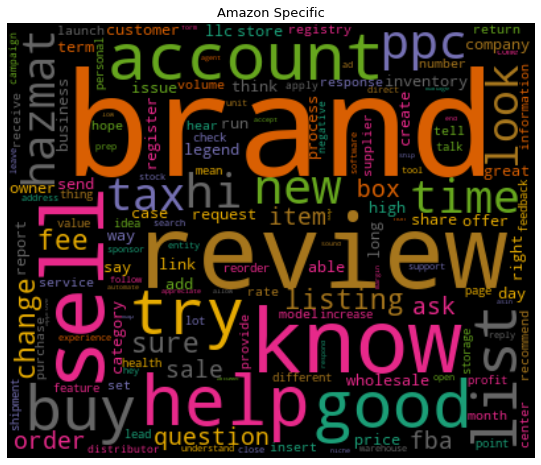

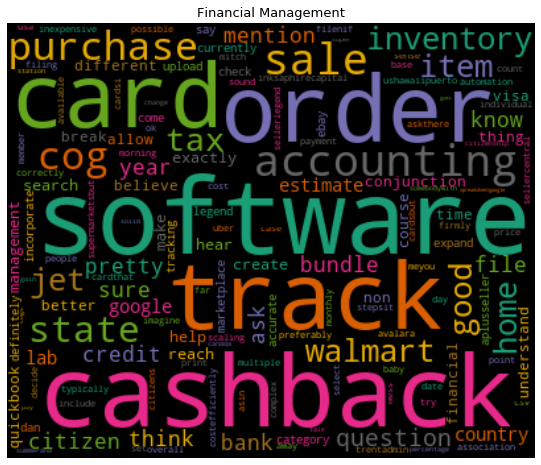

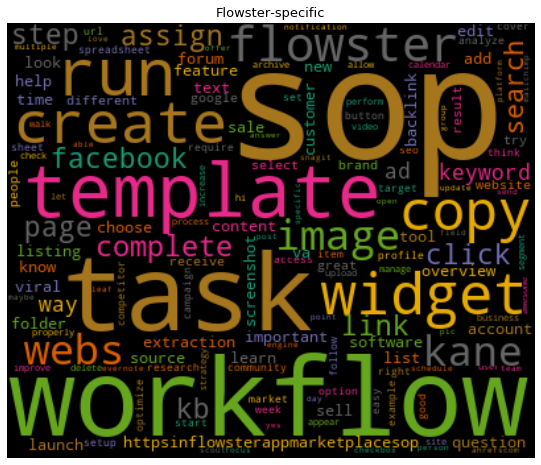

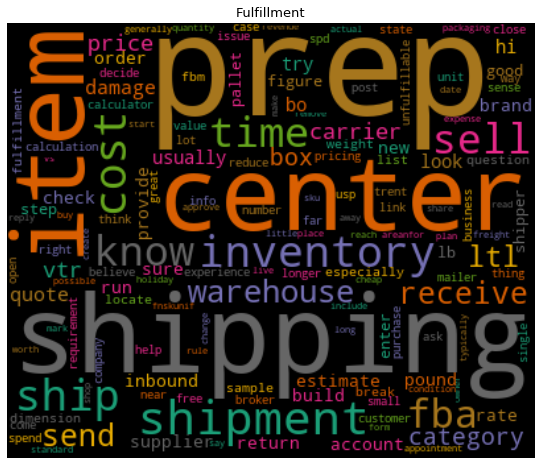

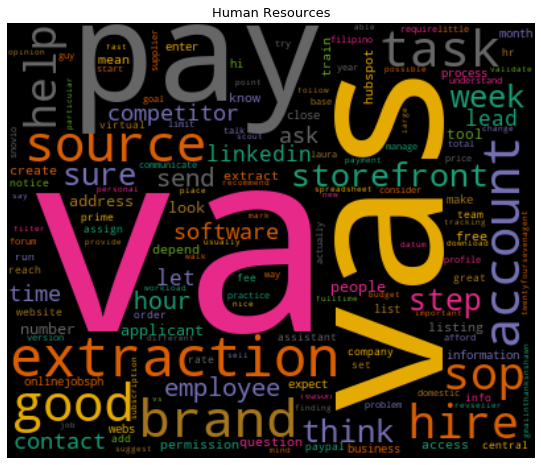

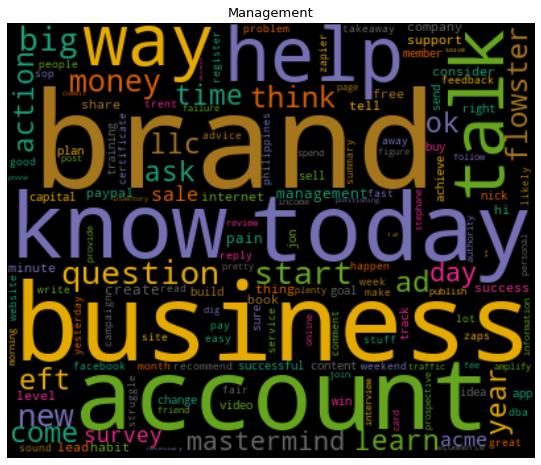

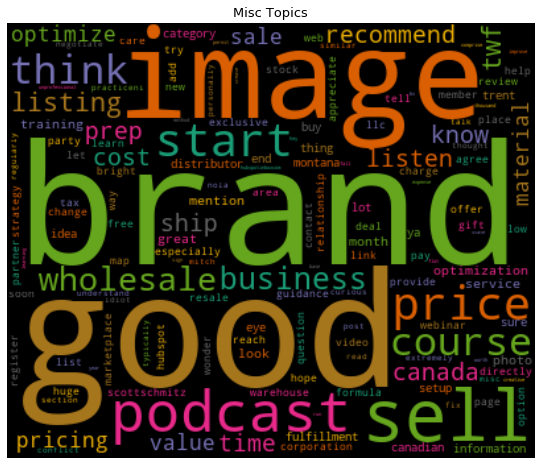

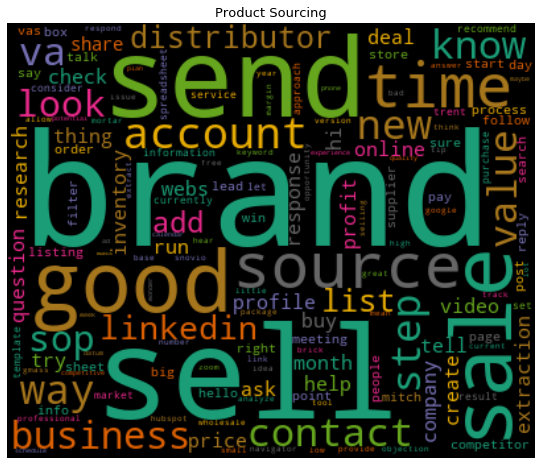

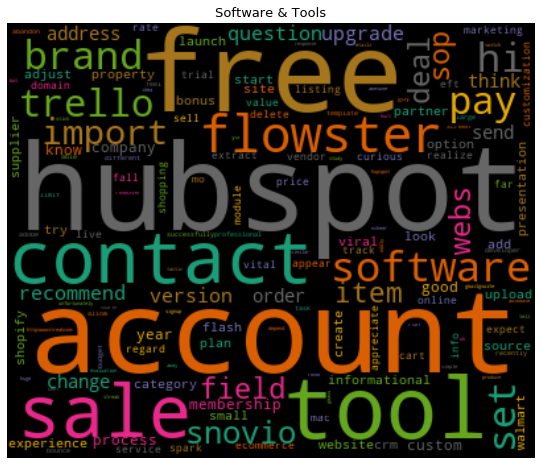

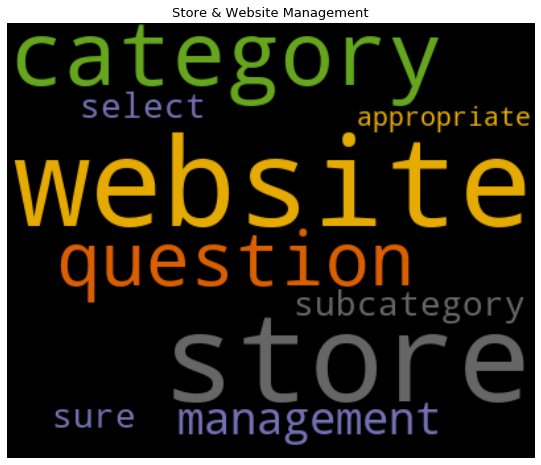

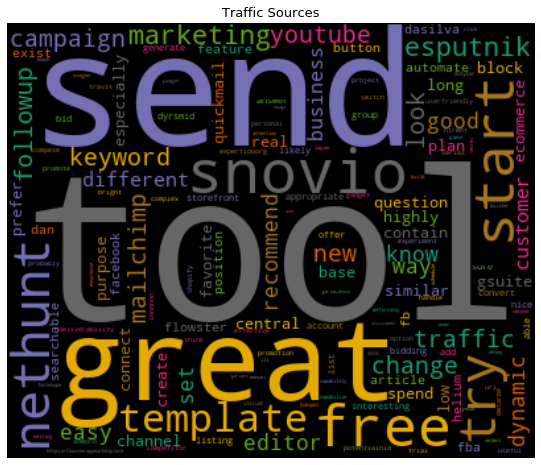

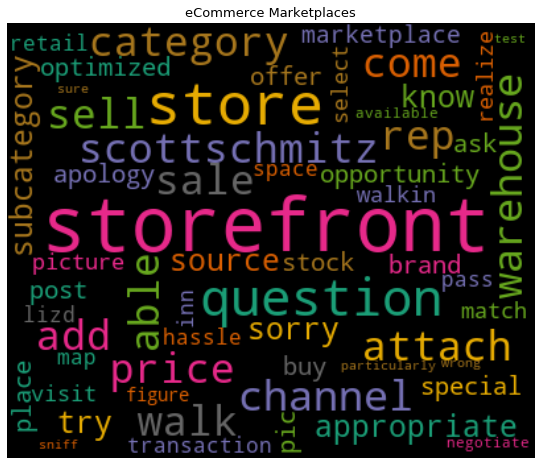

In [117]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
from matplotlib import pyplot as plt
# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
    
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
        generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

###End of getting the word graphs for different categories###

## Generate Word Cloud for Popular and Unpopular Posts

In [118]:
###Start of getting the word graphs for popular posts and unpopular posts###
train['rank_replies'] = train['Replies'].rank()
train['rank_views'] = train['Views'].rank()
train

,Topic Title,Category,Tags,Author,Commenters,Leading Comment,Other Comments,Likes,Replies,Views,word_count,stopwords,hastags,numerics,lemmatized Leading Comment,lemmatized Topic Title,lemmatized Other Comments,rank_replies,rank_views
0,product sourcing category,Product Sourcing,[],Trent-Admin,[],have questions about sourcing products this ca...,,0,0,0,23,10,0,0,question source product category use sure sele...,product source category,,21.5,21.5
1,price checker competitor storefront extraction,Product Sourcing,[],Mitch,['MoniqueAndKerry'],hi we are new forum are going through product ...,yes will need paid version options extraction ...,1,2,38,63,28,0,0,hi new forum go product source professional so...,price checker competitor storefront extraction,yes need pay version option extraction tool in...,136.5,43.0
2,top tips grow business rapidly,Product Sourcing,['Purchasing'],Pradimna_Kumar,[],as am working in amazon as seller from last ye...,,0,0,0,81,23,0,2,work amazon seller year want tip sell grow bus...,tip grow business rapidly,,21.5,21.5
3,virtual assistants,Product Sourcing,[],JimW_PB,"['Rebca', 'McDavid', 'Mitch']",does anyone have va they recommend have used o...,mcdavid most dont want share any stellar va th...,0,3,156,16,7,0,0,va recommend currently require work,virtual assistant,mcdavid not want share stellar va currently go...,180.0,134.5
4,can you sell branded products on uk,Product Sourcing,['Sourcing Brand Name Products'],Rameksuya,['Mitch'],can sell branded products on amazon uk or must...,can sell on amazon uk as well it could actuall...,0,1,78,15,6,0,0,sell branded product amazon uk amazon com,sell branded product uk,sell amazon uk actually big selling point sour...,77.5,46.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,tracking cogs,Financial Management,['Accounting & Bookkeeping'],LizD,"['APlusSeller', 'WT_Organics', 'terrifetters',...",hello does anyone have any advise on how track...,we use seller legend track cogs amazon sales c...,4,5,333,46,21,0,0,hello advise track profit cog preferably like ...,tracking cog,use seller legend track cog amazon sale course...,222.5,239.0
257,accounting software,Financial Management,['Accounting & Bookkeeping'],Trent-Admin,"['BetterLifeSales', 'Mitch', 'jims']",what accounting software does everyone use ive...,jims we use xero they are pretty solid we also...,3,3,226,20,6,0,0,accounting software use have quickbook online ...,accounting software,jim use xero pretty solid use httpsclickandmor...,180.0,201.0
258,sales channels marketplaces category,eCommerce Marketplaces,[],Trent-Admin,[],have questions about sourcing various sales ch...,,0,0,0,29,12,0,0,question source sale channel available categor...,sale channel marketplace category,,21.5,21.5
259,storefront question,eCommerce Marketplaces,[],Laura,['scottschmitz'],if am posting this in wrong place my apologies...,scottschmitz we would be able do transactions ...,0,3,196,96,40,1,0,post wrong place apology lizd like know walk s...,storefront question,scottschmitz able transaction need walkin add ...,180.0,185.0


In [119]:
# to combine key words into a Bag_of_words column
train['Bag_of_words'] = train['lemmatized Leading Comment'] + train['lemmatized Topic Title'] + train['lemmatized Other Comments']
train['Bag_of_words'] = train['Bag_of_words'].str.strip().str.replace('   ', ' ').str.replace('  ', ' ')

In [120]:
# Group into popular and not popular posts
popularity = (train['Replies'] + train['Views'])/2
train['Popularity'] = (train['Replies'] + train['Views'])/2

temp_popular = train.groupby('Popularity')
popular = temp_popular.filter(lambda x: x['Popularity'].mean() > 90)
#94

temp_unpopular = train.groupby('Popularity')
unpopular = temp_unpopular.filter(lambda x: x['Popularity']. mean() <= 90)
#166

AttributeError: 'int' object has no attribute 'expandtabs'

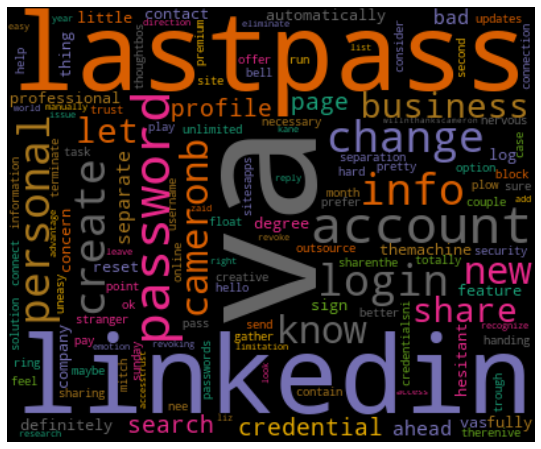

In [121]:
# Creating Document Term Matrix
data=cv.fit_transform(popular['Bag_of_words'])
popularity_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
popularity_dtm.index=popular.index

# Transposing document term matrix
popularity_dtm=popularity_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(popularity_dtm.columns):
    generate_wordcloud(popularity_dtm[product].sort_values(ascending=False),product)

AttributeError: 'int' object has no attribute 'expandtabs'

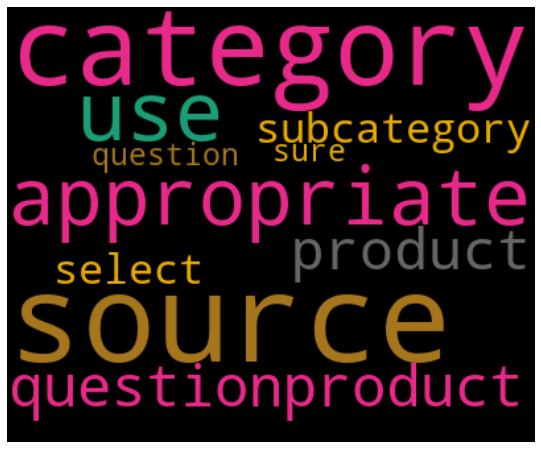

In [122]:
# Creating Document Term Matrix
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(unpopular['Bag_of_words'])
popularity_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
popularity_dtm.index=unpopular.index

# Transposing document term matrix
popularity_dtm=popularity_dtm.transpose()
# Plotting word cloud for each product
for index,product in enumerate(popularity_dtm.columns):
    generate_wordcloud(popularity_dtm[product].sort_values(ascending=False),product)

# Trying out LinearSVM

In [123]:
from sklearn.model_selection import train_test_split
y = train['Category']
X = train['Bag_of_words']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
print(X.shape, y.shape)

(260,) (260,)


In [124]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [125]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5128205128205128
                        precision    recall  f1-score   support

       Amazon Specific       0.53      0.42      0.47        19
     Flowster-specific       0.67      0.78      0.72        18
           Fulfillment       0.75      0.43      0.55         7
       Human Resources       0.50      0.50      0.50         6
            Management       1.00      0.40      0.57         5
           Misc Topics       0.00      0.00      0.00         3
      Product Sourcing       0.38      0.71      0.50        14
      Software & Tools       0.00      0.00      0.00         3
       Traffic Sources       0.00      0.00      0.00         2
eCommerce Marketplaces       0.00      0.00      0.00         1

              accuracy                           0.51        78
             macro avg       0.38      0.32      0.33        78
          weighted avg       0.52      0.51      0.49        78

CPU times: user 22.3 ms, sys: 3.3 ms, total: 25.6 ms
Wall time: 30.7 ms


/Users/kittyguz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
# create Bag_of_words2 that contains non lemmatized words
train['Bag_of_words2'] = train['Leading Comment'] + train['Topic Title'] + train['Other Comments']
train['Bag_of_words2'] = train['Bag_of_words'].str.strip().str.replace('   ', ' ').str.replace('  ', ' ')

In [127]:
# train the Linear SVM model
y = train['Category']
X = train['Bag_of_words2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5128205128205128
                        precision    recall  f1-score   support

       Amazon Specific       0.53      0.42      0.47        19
     Flowster-specific       0.67      0.78      0.72        18
           Fulfillment       0.75      0.43      0.55         7
       Human Resources       0.50      0.50      0.50         6
            Management       1.00      0.40      0.57         5
           Misc Topics       0.00      0.00      0.00         3
      Product Sourcing       0.38      0.71      0.50        14
      Software & Tools       0.00      0.00      0.00         3
       Traffic Sources       0.00      0.00      0.00         2
eCommerce Marketplaces       0.00      0.00      0.00         1

              accuracy                           0.51        78
             macro avg       0.38      0.32      0.33        78
          weighted avg       0.52      0.51      0.49        78



/Users/kittyguz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [128]:
def basic_data_processing(data, name_of_column):
    # Making words lowercase
    data[name_of_column]=train[name_of_column].apply(lambda x: x.lower())
    # Remove digits and words that contains digits
    data[name_of_column]=train[name_of_column].apply(lambda x: re.sub('\w*\d\w*','', x))
    # Remove extra spaces
    data[name_of_column]=train[name_of_column].apply(lambda x: re.sub(' +',' ',x))
    # Remove punctuations from comments
    data[name_of_column] = train[name_of_column].str.replace('[^\w\s]','')
    
basic_data_processing(copy_train, 'Leading Comment')
basic_data_processing(copy_train, 'Topic Title')
basic_data_processing(copy_train, 'Other Comments')
copy_train

,Topic Title,Category,Tags,Author,Commenters,Leading Comment,Other Comments,Likes,Replies,Views,word_count,stopwords,hastags,numerics
0,product sourcing category,Product Sourcing,[],Trent-Admin,[],have questions about sourcing products this ca...,,0,0,0,23,10,0,0
1,price checker competitor storefront extraction,Product Sourcing,[],Mitch,['MoniqueAndKerry'],hi we are new forum are going through product ...,yes will need paid version options extraction ...,1,2,38,63,28,0,0
2,top tips grow business rapidly,Product Sourcing,['Purchasing'],Pradimna_Kumar,[],as am working in amazon as seller from last ye...,,0,0,0,81,23,0,2
3,virtual assistants,Product Sourcing,[],JimW_PB,"['Rebca', 'McDavid', 'Mitch']",does anyone have va they recommend have used o...,mcdavid most dont want share any stellar va th...,0,3,156,16,7,0,0
4,can you sell branded products on uk,Product Sourcing,['Sourcing Brand Name Products'],Rameksuya,['Mitch'],can sell branded products on amazon uk or must...,can sell on amazon uk as well it could actuall...,0,1,78,15,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,tracking cogs,Financial Management,['Accounting & Bookkeeping'],LizD,"['APlusSeller', 'WT_Organics', 'terrifetters',...",hello does anyone have any advise on how track...,we use seller legend track cogs amazon sales c...,4,5,333,46,21,0,0
257,accounting software,Financial Management,['Accounting & Bookkeeping'],Trent-Admin,"['BetterLifeSales', 'Mitch', 'jims']",what accounting software does everyone use ive...,jims we use xero they are pretty solid we also...,3,3,226,20,6,0,0
258,sales channels marketplaces category,eCommerce Marketplaces,[],Trent-Admin,[],have questions about sourcing various sales ch...,,0,0,0,29,12,0,0
259,storefront question,eCommerce Marketplaces,[],Laura,['scottschmitz'],if am posting this in wrong place my apologies...,scottschmitz we would be able do transactions ...,0,3,196,96,40,1,0


In [129]:
# create Bag_of_words that contains only simply processed text
copy_train['Bag_of_words'] = copy_train['Leading Comment'] + copy_train['Topic Title'] + copy_train['Other Comments']
copy_train['Bag_of_words2'] = copy_train['Bag_of_words'].str.strip().str.replace('   ', ' ').str.replace('  ', ' ')

In [130]:
# train the Linear SVM model
y = copy_train['Category']
X = copy_train['Bag_of_words']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5641025641025641
                        precision    recall  f1-score   support

       Amazon Specific       0.65      0.58      0.61        19
     Flowster-specific       0.65      0.83      0.73        18
           Fulfillment       0.75      0.43      0.55         7
       Human Resources       0.20      0.17      0.18         6
            Management       1.00      0.60      0.75         5
           Misc Topics       0.00      0.00      0.00         3
      Product Sourcing       0.46      0.79      0.58        14
      Software & Tools       0.00      0.00      0.00         3
       Traffic Sources       0.00      0.00      0.00         2
eCommerce Marketplaces       0.00      0.00      0.00         1

              accuracy                           0.56        78
             macro avg       0.37      0.34      0.34        78
          weighted avg       0.54      0.56      0.53        78



/Users/kittyguz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


###### From current observation, the less process data the better( better not to delete too many words).